In [9]:
import re
import nltk
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загружаем стоп-слова
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
stop_symb = set(['.', ' '])

# Инициализация инструментов для нормализации текста
segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_analyzer = MorphAnalyzer()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    
    normalized_tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in stop_words and token.lemma not in stop_symb:
            normalized_tokens.append(token.lemma)
    return ' '.join(normalized_tokens)

# Пример использования
texts = [
    "Влияние солнечной активности на климат Земли изучается учеными.",
    "Новые открытия в области квантовой физики меняют представление о материи.",
    "Биологические исследования показали связь между генетикой и поведением.",
    "Последние достижения в робототехнике открывают новые возможности для медицины.",
    "Астрономы обнаружили новую экзопланету в зоне обитаемости.",
    "Исследования в области нейробиологии помогают лучше понять работу мозга.",
    "Нанотехнологии находят широкое применение в различных отраслях промышленности.",
    "Генетическая инженерия обещает революционные изменения в сельском хозяйстве.",
    "Изучение микробиома человека открывает новые пути для лечения болезней.",
    "Космические миссии продолжают приносить важные данные о других планетах.",
    "Современные исследования климатических изменений предупреждают об опасностях.",
    "Разработка новых материалов с уникальными свойствами идет полным ходом.",
    "Энергетика будущего: перспективы использования возобновляемых источников энергии.",
    "Исследования в области экологии помогают сохранить биоразнообразие.",
    "Новые методы лечения рака разрабатываются на основе иммунных клеток."
]

normalized_texts = [normalize_text(text) for text in texts]
print(normalized_texts)


[nltk_data] Downloading package stopwords to /Users/roman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['влияние солнечный активность климат земля изучаться ученый', 'новый открытие область квантовый физик менять представление материя', 'биологический исследование показать связь генетика поведение', 'последний достижение робототехника открывать новый возможность медицина', 'астроном обнаружить новый экзопланета зона обитаемость', 'исследование область нейробиология помогать хороший понять работа мозг', 'нанотехнология находить широкий применение различный отрасль промышленность', 'генетический инженерия обещать революционный изменение сельский хозяйство', 'изучение микробиом человек открывать новый путь лечение болезнь', 'космический миссия продолжать приносить важный данные планета', 'современный исследование климатический изменение предупреждать опасность', 'разработка новый материал уникальный свойство идти полный ход', 'энергетика будущее : перспектива использование возобновлять источник энергия', 'исследование область экология помогать сохранить биоразнообразие', 'новый метод лечен

In [10]:
# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(normalized_texts)
X.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
# Сжатие векторов до 2 компонентов
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


In [12]:
# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)


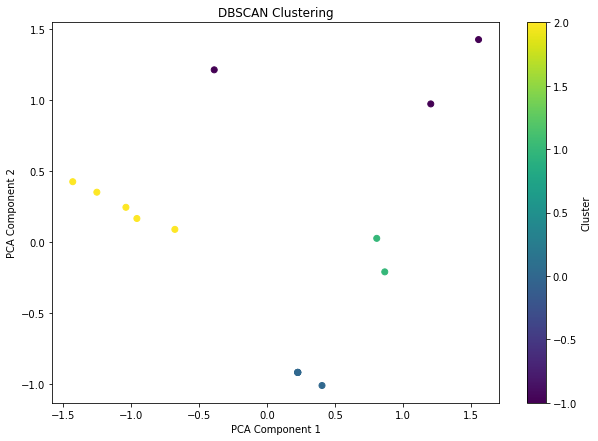

Cluster 0:
['Влияние солнечной активности на климат Земли изучается учеными.', 'Нанотехнологии находят широкое применение в различных отраслях промышленности.', 'Генетическая инженерия обещает революционные изменения в сельском хозяйстве.', 'Космические миссии продолжают приносить важные данные о других планетах.', 'Энергетика будущего: перспективы использования возобновляемых источников энергии.']
Cluster 1:
['Биологические исследования показали связь между генетикой и поведением.', 'Современные исследования климатических изменений предупреждают об опасностях.']
Cluster 2:
['Последние достижения в робототехнике открывают новые возможности для медицины.', 'Астрономы обнаружили новую экзопланету в зоне обитаемости.', 'Изучение микробиома человека открывает новые пути для лечения болезней.', 'Разработка новых материалов с уникальными свойствами идет полным ходом.', 'Новые методы лечения рака разрабатываются на основе иммунных клеток.']
Cluster -1:
['Новые открытия в области квантовой физ

In [13]:
# Визуализация результатов
df = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'cluster': clusters})

plt.figure(figsize=(10, 7))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Выделение тем по кластерам
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [texts[i] for i in range(len(clusters)) if clusters[i] == cluster]
    print(cluster_texts)
